In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120)

In [2]:
# Import needed libraries
from utils import datasets
reload(datasets)
from utils import visualize
reload(visualize);
from utils import brain
reload(brain)
from utils.brain import Brain

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


# 1) Load the dataset

In [3]:
images, labels = datasets.load_arabic_digits()

In [4]:
images.shape

(60000, 28, 28)

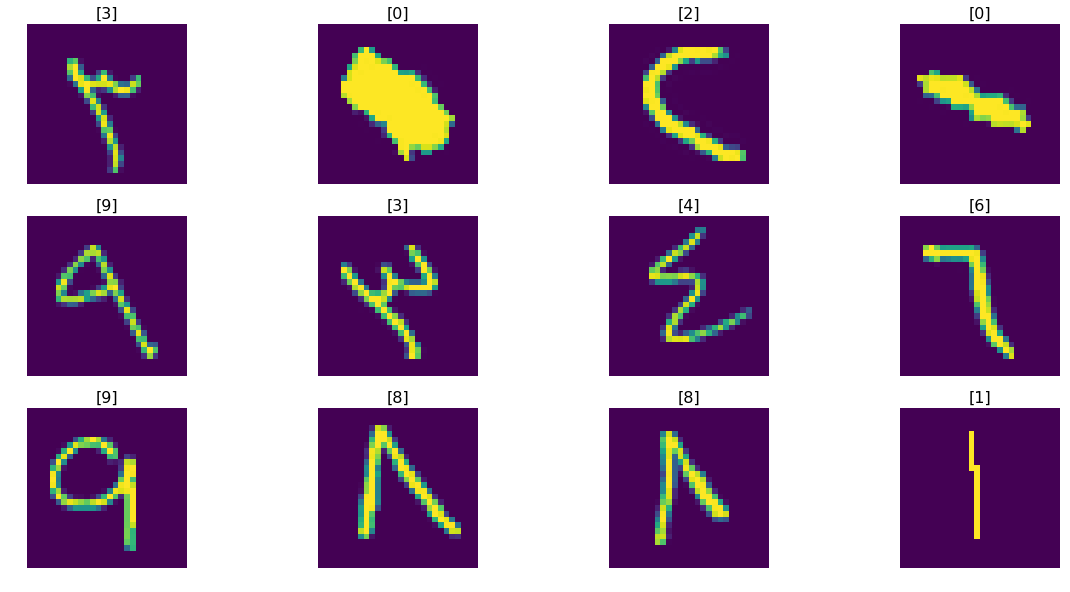

In [5]:
visualize.show_sample(images, labels)

In [6]:
images[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  18, 117, 214, 255, 166,  45,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 154, 234, 228, 

In [7]:
labels[7]

array([7])

# 2) Build the brain!

In [8]:
brain = Brain()

In [9]:
images.shape, labels.shape

((60000, 28, 28), (60000, 1))

In [10]:
brain.learn(images, labels)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s - loss: 0.1176 - acc: 0.9670 - val_loss: 0.0769 - val_acc: 0.9799
Epoch 2/5
48000/48000 [==============================] - 6s - loss: 0.0484 - acc: 0.9869 - val_loss: 0.1034 - val_acc: 0.9776
Epoch 3/5
48000/48000 [==============================] - 7s - loss: 0.0359 - acc: 0.9909 - val_loss: 0.0739 - val_acc: 0.9848
Epoch 4/5
48000/48000 [==============================] - 7s - loss: 0.0306 - acc: 0.9926 - val_loss: 0.0984 - val_acc: 0.9838
Epoch 5/5
48000/48000 [==============================] - 7s - loss: 0.0284 - acc: 0.9936 - val_loss: 0.1027 - val_acc: 0.9833


## 3) Test

In [11]:
images_test, labels_test = datasets.load_arabic_digits_test()

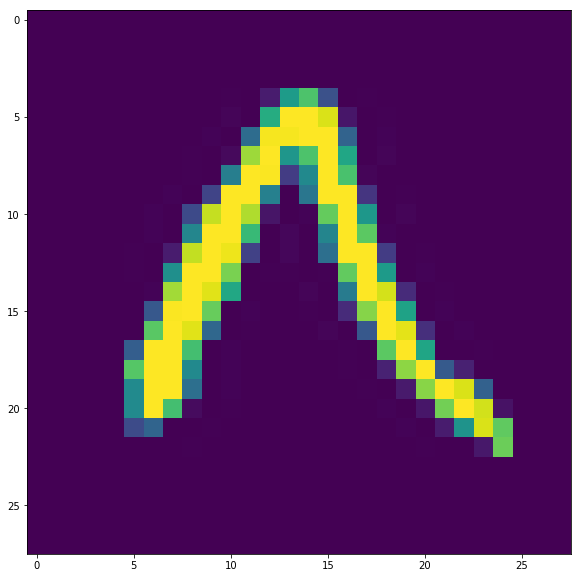

In [12]:
visualize.plot_image(images_test[18])

In [13]:
prediction = brain.predict(images_test[18])

In [14]:
prediction

array([[  1.81871320e-30,   2.51411810e-35,   6.67518614e-27,   5.91347952e-43,   1.53486371e-27,   3.45860854e-25,
          4.65903067e-29,   0.00000000e+00,   1.00000000e+00,   3.95303722e-24]], dtype=float32)

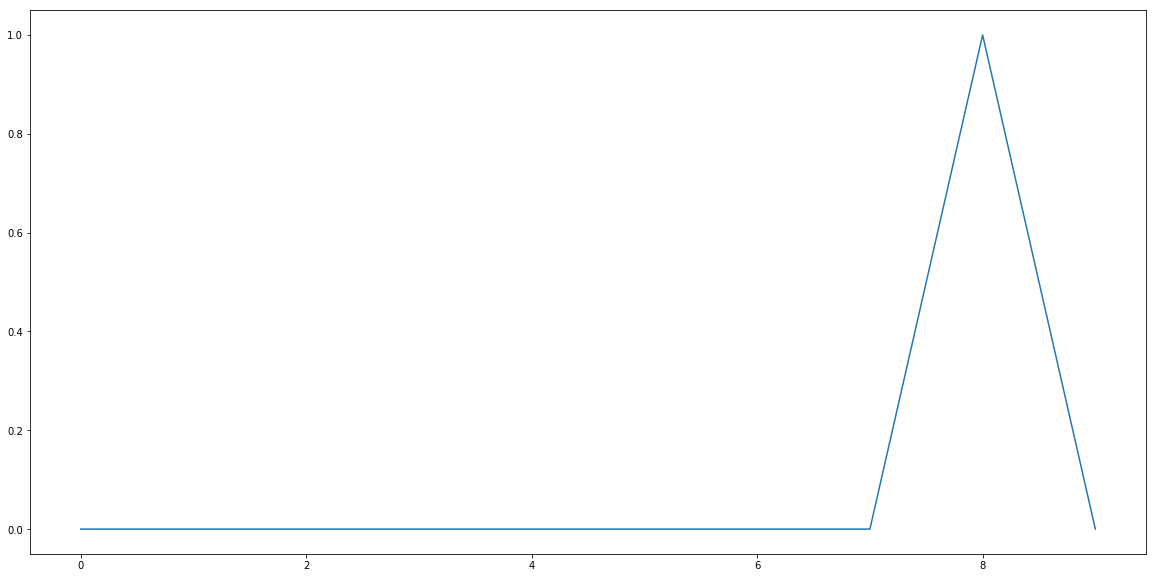

In [15]:
visualize.plot_prediction(prediction)

In [16]:
# Run the entire test set
predictions = brain.predict_many(images_test)

In [17]:
predictions

array([[  8.23913395e-01,   1.69736850e-07,   2.71013541e-05, ...,   6.52929566e-06,   9.42813017e-07,   1.08023767e-06],
       [  4.58384477e-07,   9.99998689e-01,   1.81448051e-11, ...,   1.88476164e-07,   5.41377665e-10,   5.33170209e-11],
       [  6.20888280e-12,   2.02754565e-14,   9.99990761e-01, ...,   2.30680405e-12,   2.28099362e-09,   1.00515107e-09],
       ..., 
       [  1.02996492e-32,   4.18505927e-33,   1.68800931e-34, ...,   1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.94402708e-13,   2.03920292e-22,   8.01275973e-12, ...,   2.27535457e-30,   1.00000000e+00,   2.48916859e-12],
       [  1.20636307e-31,   2.22306108e-38,   5.00370479e-25, ...,   1.79258849e-29,   2.60450541e-34,   1.00000000e+00]], dtype=float32)

In [18]:
# Let's look at which ones we got wrong.

predictions = np.argmax(predictions, axis=1)
incorrect = np.where(predictions != labels_test[:, 0])[0]

In [19]:
incorrect

array([ 193,  375,  421,  494,  556,  609,  706,  768,  774,  788,  940, 1033, 1053, 1223, 1283, 1605, 1611, 1625, 1691,
       1811, 1902, 1904, 1910, 1913, 1923, 1945, 1949, 1955, 1968, 1984, 1985, 1989, 2013, 2020, 2030, 2065, 2280, 2292,
       2695, 2773, 2880, 2890, 2953, 3036, 3054, 3066, 3080, 3174, 3305, 3313, 3315, 3335, 3496, 3526, 3593, 3611, 3615,
       3627, 3643, 3711, 3715, 3725, 3740, 3745, 3770, 3794, 3795, 4020, 4060, 4070, 4080, 4091, 4220, 4323, 4364, 4470,
       4505, 4605, 4625, 4645, 4703, 4733, 4753, 4763, 4783, 4792, 4793, 4940, 5000, 5001, 5010, 5335, 5378, 5435, 5445,
       5549, 5569, 5575, 5613, 5623, 5653, 5658, 5675, 5705, 5710, 5734, 5750, 5821, 5823, 5838, 5853, 5893, 5909, 6125,
       6343, 6388, 6393, 6610, 6611, 6641, 6651, 6684, 6755, 6844, 6848, 6899, 6923, 6998, 7046, 7105, 7111, 7121, 7141,
       7171, 7181, 7215, 7235, 7245, 7255, 7390, 7440, 7480, 7704, 7713, 7724, 7820, 7825, 7836, 7880, 7913, 7939, 7963,
       7964, 7983, 7989, 8110, 8

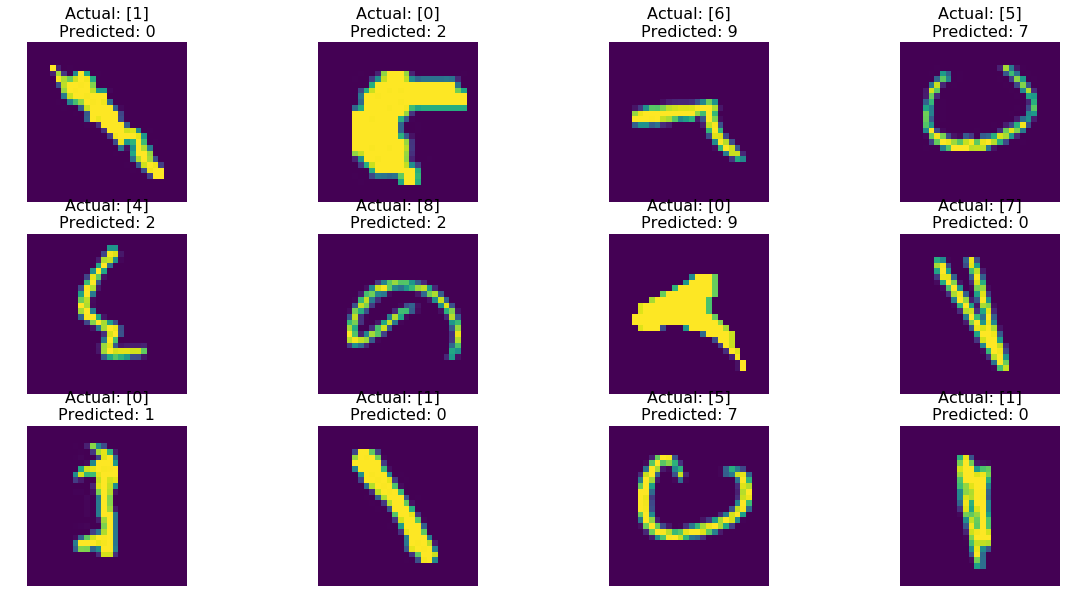

In [20]:
visualize.show_sample_incorrect(images_test, incorrect, labels_test, predictions)